### This notebook is an implemention of the scipy package acoording to the lecture.

In [2]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## in this notebook, I'm going to run the methods we learned in class on a dataset of penguins.

In [6]:
df = pd.read_csv("/home/yair/Documents/Bar-Ilan/third-year/semester2/applied-statistics/my_work/scipy/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
df = df.dropna()
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


#### violin plot of the data:


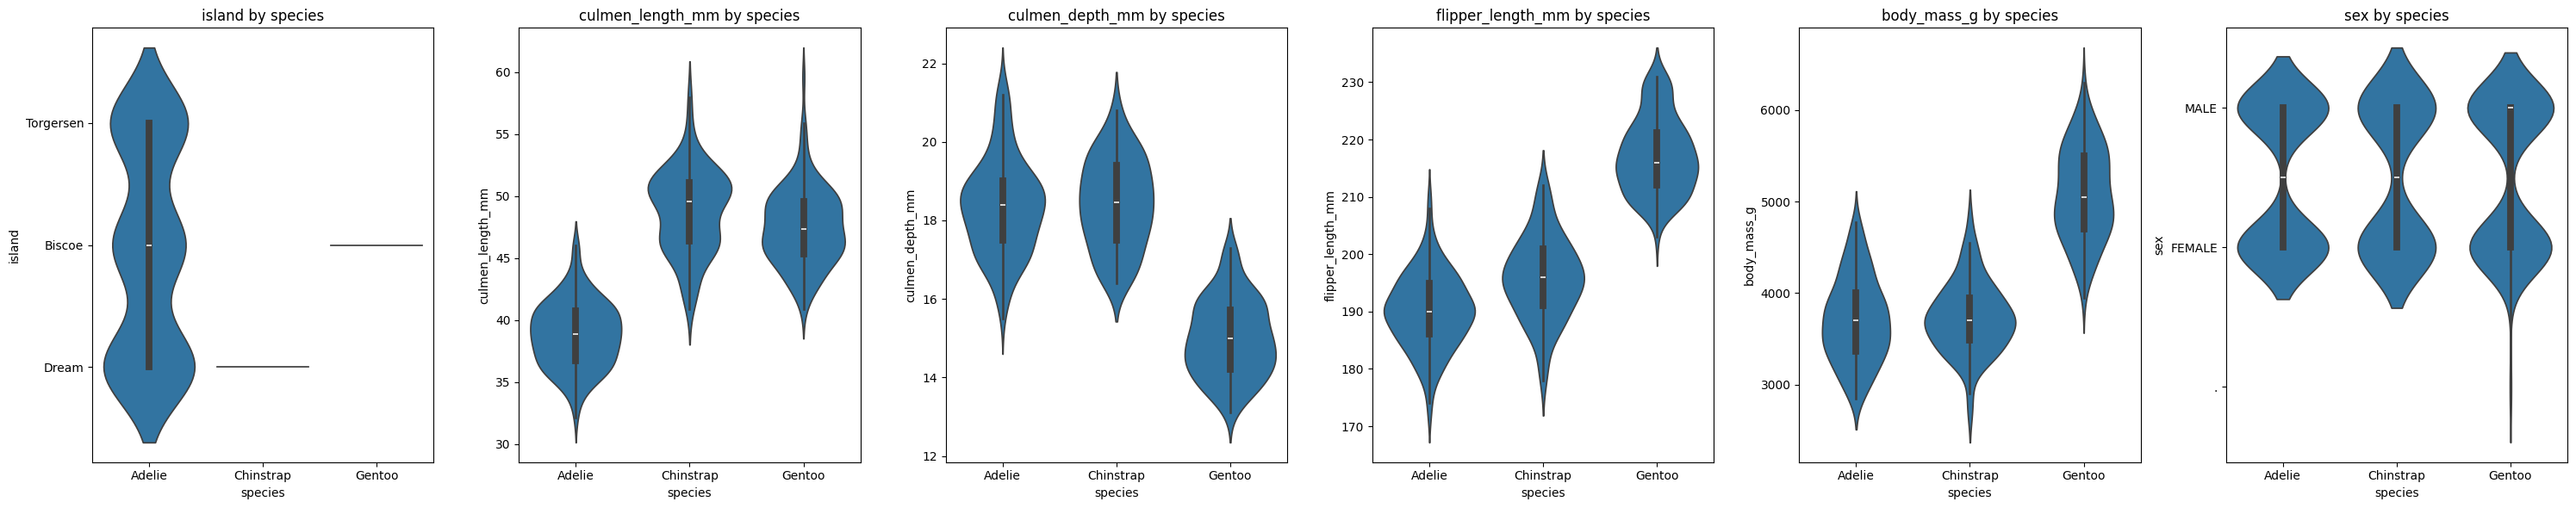

In [20]:
target = 'species' 

# Filter out the target column from the features
features = [col for col in df.columns if col != target]

# Determine the number of plots (subplots) based on the number of features
num_plots = len(features)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5*num_plots, 6))

# Iterate through each feature and plot it
for i, feature in enumerate(features):
    sns.violinplot(x=target, y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by {target}')

# Adjust the layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


#### Now, let's look at every feature on it's on, and try to find statistical connection between his part.

In [21]:
# Defining a dataframe for each feature
Adelie      =df[df['species']=='Adelie']
Chinstrap  =df[df['species']=='Chinstrap']
Gentoo   =df[df['species']=='Gentoo']
Adelie.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


### We'll run an t-test. our hypothesis is that The means of "culmen_length_mm" and "culmen_length_mm" are equal.

In [32]:
feature1 = "culmen_length_mm"
feature2 = "culmen_depth_mm"
t_stat, p_value = stats.ttest_rel(Adelie[feature1], Adelie[feature2])
print(f'T-test between {feature1} and {feature2}:')
print(f'T-statistic: {t_stat}, P-value: {p_value}\n')

T-test between culmen_length_mm and culmen_depth_mm:
T-statistic: 100.41650563037696, P-value: 6.4782416356389175e-136



#### We can see that the average difference between culmen_length_mm and culmen_depth_mm is quite large compared to the variability in those differences. 
#### We also got a very small p-value, which mean that our result is highly statistically significant.

### Let's also check it under the assumption of independence between the features, between Adelie and Gentoo.

In [33]:
stats.ttest_ind(Adelie[feature1], Gentoo[feature1])

TtestResult(statistic=-24.647104351374526, pvalue=2.023659458398681e-70, df=264.0)

#### We can see that we roughly the same result, and the two means are very differenet.

### Let's move on and check the similarities in variance.
#### Using the Bartlett’s test, we can assess whether the variances of two or more groups are equal.

In [34]:
stats.bartlett(Adelie[feature1], Gentoo[feature1])

BartlettResult(statistic=3.1048130326248273, pvalue=0.07806119374007998)

#### p-value is bigger than 0.05, we don't have enough evidence to to conculde that the variance is different. 

## After we got some clue on how does the features fare with each other, let's try to find out their distribution.
#### using probplot, we can comapre the data to a probablity distribution and show the result visualy. 

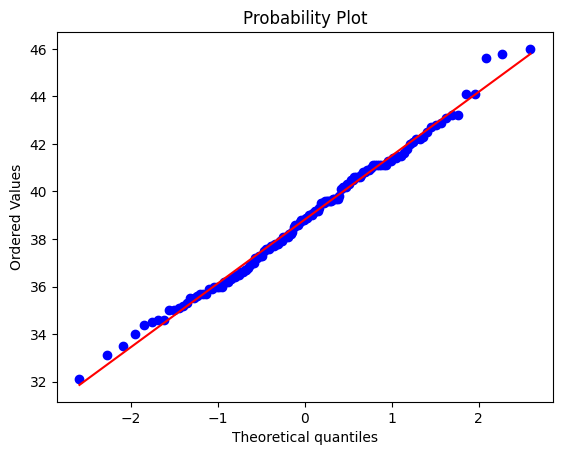

In [29]:
stats.probplot(Adelie[feature1], dist="norm", plot=plt);

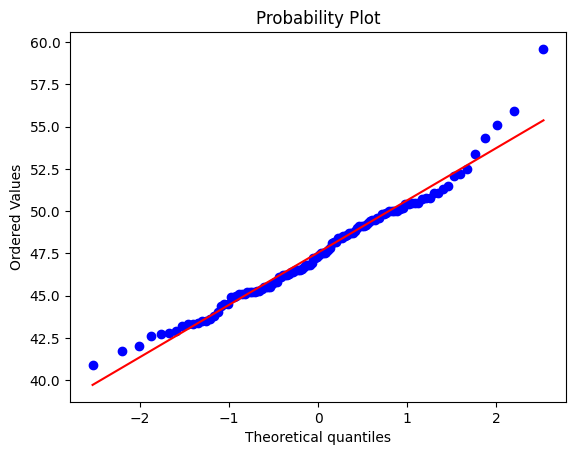

In [35]:
stats.probplot(Gentoo[feature1], dist="norm", plot=plt);

#### And now a more robust normality test:

In [36]:
stats.shapiro(Adelie[feature1])

ShapiroResult(statistic=0.992888894142337, pvalue=0.6848410055512179)

In [37]:
stats.shapiro(Gentoo[feature1])

ShapiroResult(statistic=0.973458473567677, pvalue=0.01783086965617408)

#### We can conculde that for Adelie kind of penguin, "culmen_length_mm" distribute normally, and for Gentoo it's not.

### Let's try to compare the ECDF of feature1 between the penguins.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


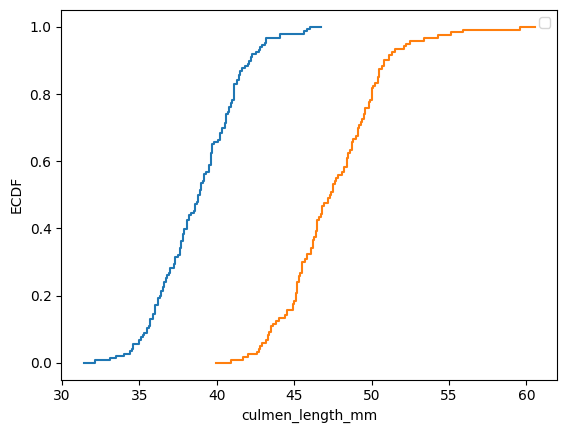

In [40]:
Adelie_ecdf = stats.ecdf(Adelie[feature1])
Adelie_ecdf.cdf.plot(plt)


Gentoo_ecdf = stats.ecdf(Gentoo[feature1])
Gentoo_ecdf.cdf.plot(plt)
plt.xlabel(r"culmen_length_mm")
plt.ylabel('ECDF')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


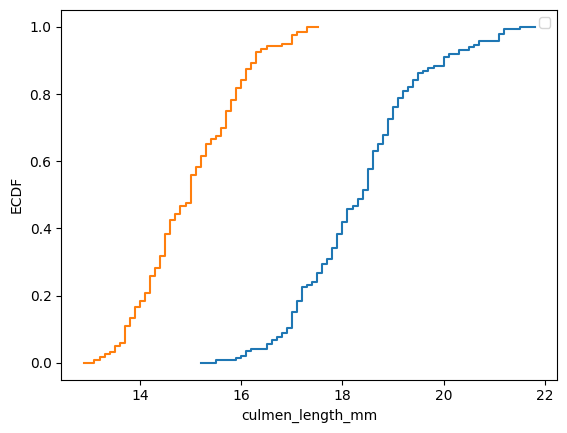

In [41]:
Adelie_ecdf = stats.ecdf(Adelie[feature2])
Adelie_ecdf.cdf.plot(plt)


Gentoo_ecdf = stats.ecdf(Gentoo[feature2])
Gentoo_ecdf.cdf.plot(plt)
plt.xlabel(r"culmen_depth_mm")
plt.ylabel('ECDF')
plt.legend()

#### When we compared the cdf, for the features culmen length and culmen depth, we can see that it's seems pretty smiliar, but like we conculded earilr, the mean is completely different.

### After seeing the difference in a visual way, let's run the Kolmogorov-Smirnov test for a numerical comparison.

In [42]:
stats.ks_2samp(Adelie[feature1], Gentoo[feature1])

KstestResult(statistic=0.8996575342465754, pvalue=4.2918227531420866e-57, statistic_location=42.5, statistic_sign=1)

#### And the test assess what I assumed, that the difference between Adelie and Gentoo in terms of culmen length is great, and Adelie has  significantly greater culmen length compared to Gentoo.
#### We can also test it with the parameter alternative, that will check whether the distribution of the first sample is stochastically greater than that of the second sample when set on "greater". 

In [43]:
stats.ks_2samp(Adelie[feature1], Gentoo[feature1],alternative="greater")

KstestResult(statistic=0.8996575342465754, pvalue=2.1459113765712405e-57, statistic_location=42.5, statistic_sign=1)

#### And we got similar results.

## I will try to check the difference in distribution across the three penguins.
#### I can do it using Kruskal-Wallis H-test.

In [45]:
stats.kruskal(Adelie[feature1], Gentoo[feature1], Chinstrap[feature1])

KruskalResult(statistic=237.52971210090877, pvalue=2.636807183979243e-52)

#### Our results show that there is a significant differences in the Culmen features across species.

## Let's find a confidence interval for the mean of culmen length feature.

In [48]:
statistic = lambda x : x.mean()
res = stats.bootstrap([df[feature1]], statistic, confidence_level=0.9)
res.confidence_interval

ConfidenceInterval(low=43.51137724550899, high=44.4915073716579)

#### We know 90% confident that the mean of culmen length is between 43.5 to 44.5

# we finished our need for the penguins dataset.
### we'll now move on to a different dataset, to check out more capabilites of the package scipy. I will show case two methods, Fisher's Exact Test and Chi-Squared Test.

In [54]:
import numpy as np

# Define random counts for the contingency table
treatment_groups = ['Group A', 'Group B', 'Group C']
outcomes = ['Success', 'Failure']

# Generate random counts
random_counts = np.random.randint(10, 100, size=(len(outcomes), len(treatment_groups)))

# Create the contingency table
contingency_table = pd.DataFrame(random_counts, index=outcomes, columns=treatment_groups)

# Display the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
         Group A  Group B  Group C
Success       40       83       43
Failure       97       49       14


#### We'll run chi-squared test:

In [55]:
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f'\nChi-Squared Statistic: {chi2_stat}')
print(f'P-Value: {p_value_chi2}')
print(f'Degrees of Freedom: {dof}')
print(f'Expected Frequencies Table:\n{expected}')


Chi-Squared Statistic: 47.13282654550376
P-Value: 5.824206402072042e-11
Degrees of Freedom: 2
Expected Frequencies Table:
[[69.7607362  67.21472393 29.02453988]
 [67.2392638  64.78527607 27.97546012]]


### I will reject the null hypothesis, and we can say that there is a significant association between treatment groups and outcomes.

#### since fisher only works on 2*2 blocks, I'll apply it on group A And B.

In [58]:
subset_data = contingency_table[['Group A', 'Group B']]
subset_table = pd.DataFrame(subset_data, index=outcomes)

# Perform Fisher's Exact Test
odds_ratio, p_value_fisher = stats.fisher_exact(subset_table)

print(f'Odds Ratio: {odds_ratio}')
print(f'P-Value: {p_value_fisher}')

Odds Ratio: 0.2434480188796423
P-Value: 3.0255263690816166e-08


#### the fisher test confirmed what we learned in chi-squared test.